In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

## Preparing Dataset for Models Training

### Handling Null Values

In [2]:
from sklearn.preprocessing import LabelEncoder

In [1]:
df =pd.read_csv('../data/datasets/Bondora_preprocessed.csv', low_memory=False)
df.head()

NameError: name 'pd' is not defined

In [ ]:
# analysis of null values of categorical variables
categorical = df.select_dtypes("object")
null_count_cat = categorical.isnull().sum()
print(null_count_cat[null_count_cat > 0])

VerificationType                        50
Gender                                  45
Education                               50
MaritalStatus                           50
EmploymentStatus                       202
EmploymentDurationCurrentEmployer     1026
OccupationArea                          91
HomeOwnershipType                     1657
Rating                                2732
WorseLateCategory                    23189
CreditScoreEsMicroL                  28161
dtype: int64


All the null values for categorical variables would be renamed as "Unknown"

In [ ]:
categorical = categorical.fillna("Unknown")
categorical.isnull().sum()

NewCreditCustomer                    0
VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
UseOfLoan                            0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
Rating                               0
Restructured                         0
WorseLateCategory                    0
CreditScoreEsMicroL                  0
Defaulted                            0
dtype: int64

In [ ]:
# analysis of null values of munerical variables
df = df.drop(categorical, axis=1)
null_count_num = df.isnull().sum()

print(null_count_num[null_count_num > 0])

MonthlyPayment                             6660
DebtToIncome                                 50
FreeCash                                     50
ExpectedLoss                               2638
LossGivenDefault                           2638
ExpectedReturn                             2638
ProbabilityOfDefault                       2638
PrincipalOverdueBySchedule                14843
RecoveryStage                             38087
ModelVersion                               2638
InterestAndPenaltyBalance                   354
NoOfPreviousLoansBeforeLoan                   8
AmountOfPreviousLoansBeforeLoan               8
PreviousRepaymentsBeforeLoan              39565
PreviousEarlyRepaymentsCountBeforeLoan        8
NrOfScheduledPayments                     66930
dtype: int64


In [ ]:
# identify and remove columns with more than 40% of null values
print(null_count_num[null_count_num / len(df) > 0.4])
df = df.drop(columns=null_count_num[null_count_num / len(df) > 0.4].index)

NrOfScheduledPayments    66930
dtype: int64


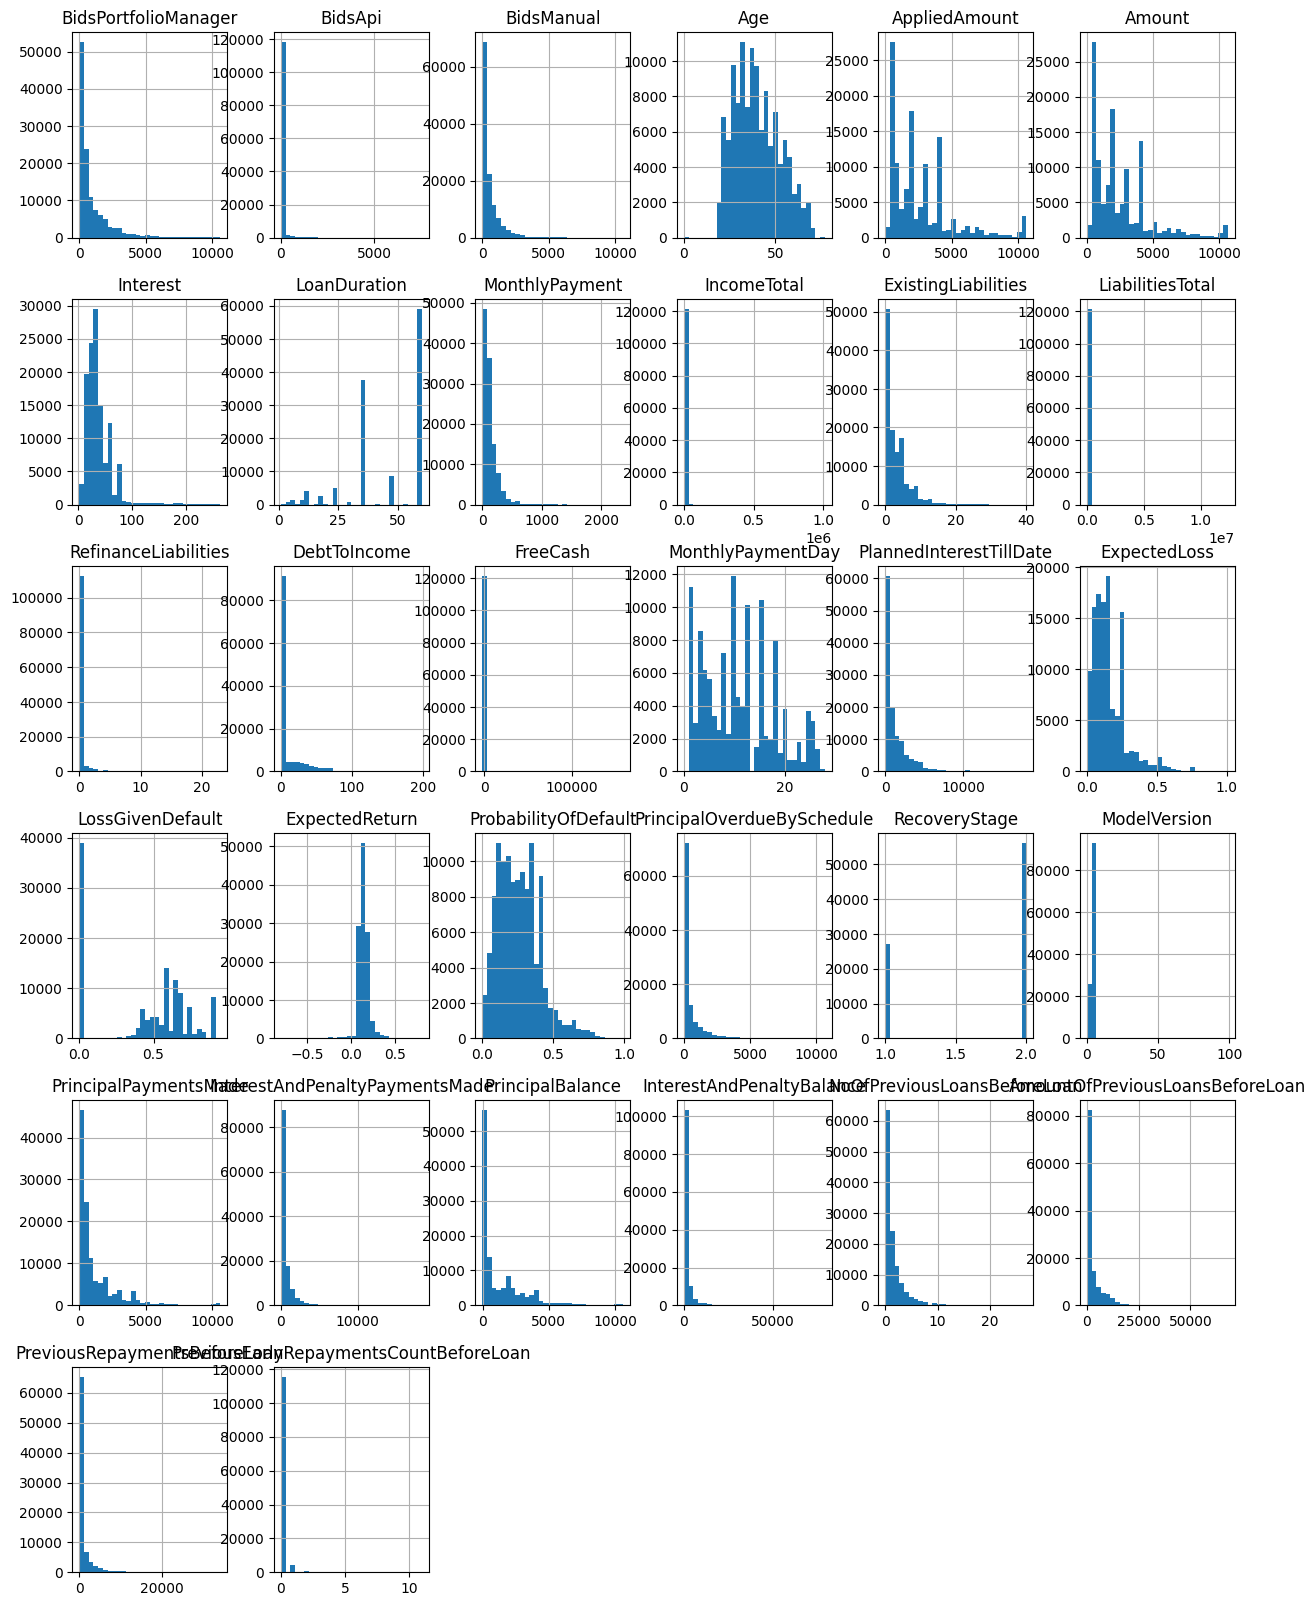

In [ ]:
# distribution analusis of null values for numerical variables
df.hist(figsize=(15, 20), bins=30)
plt.show()

In order to handle null values in numerical columns we will not be using advanced methods like K-Nearest Neighbors due to simplicity of selected ML models and sustainability concerns. Hence, since distribution of most of the columns is skewed, null values will be replaced with median value

In [ ]:
df = df.fillna(df.median())
null_count_num = df.isnull().sum()
print(null_count_num[null_count_num > 0])

Series([], dtype: int64)


Now, we will encode categorical variables via Label Encoder method

In [ ]:
label_encoder = LabelEncoder()
for col in categorical.columns:
    categorical[col] = label_encoder.fit_transform(categorical[col])

categorical.head()

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,WorseLateCategory,CreditScoreEsMicroL,Defaulted
0,1,0,1,0,0,7,3,0,3,0,12,7,3,0,4,11,0
1,1,1,1,0,0,3,1,0,0,0,16,7,2,0,4,11,0
2,0,0,1,1,0,3,3,1,0,7,17,5,0,0,4,11,1
3,0,3,6,1,1,7,0,2,1,9,12,4,6,0,4,4,0
4,0,0,6,0,1,9,3,1,3,5,12,9,7,0,4,6,0


In [ ]:
# join categorical and numerical dataframes
df = df.join(categorical)
df.shape

(121461, 50)

In [ ]:
# save dataset that is ready for model training
df.to_csv('../data/datasets/Bondora_filled.csv',index=False)